# Case - Score de crédito dos clientes de um banco

## Introdução

Um grande banco tem uma base de dados de 100.000 clientes, contendo idade, profissão, salário anual, entre outras informações. Dentro dessa base, existe ainda o score, métrica na qual o cliente é classificado, com base em todos os seus dados disponíveis, como bom, ruim ou padrão. 

Este KPI é utilizado para definir se o banco vai emprestar dinheiro ao cliente ou não e se ele vai ter o crédito que deseja dentre outros benefícios dentro do banco. Portanto, é muito importante classificá-lo de forma correta, pois um erro nesta análise pode gerar problemas, cedendo mais dinheiro a clientes que não são bons pagadores. 

## Objetivo do projeto

A empresa necessita de um projeto com o objetivo de, utilizando a base de dados já disponível, seja possível definir o score de crédito dos novos clientes, classificando-os como: Ruim, Ok ou Bom.

## Análise dos Dados

Pela análise do objetivo de projeto, define-se este caso como um problema de classificação. Portanto, precisa-se de algoritmos capazes de, com um grupo de variáveis preditivas disponíveis, prever em que grupo se encaixa a variável "Target" (score de crédito)

Para iniciar a solução, importou-se o dataset de clientes com os scores disponíveis. Esta será a base de dados utilizada para treinar e testar o modelo de machine learning. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clientes = pd.read_csv("clientes.csv")
display(clientes)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.465380,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.465380,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.465380,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.465380,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.465380,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.028477,alto_gasto_pagamento_alto,479.866228,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.028477,alto_gasto_pagamento_medio,496.651610,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.028477,alto_gasto_pagamento_alto,516.809083,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.028477,baixo_gasto_pagamento_alto,319.164979,Standard,1,0,0,0,1


In [43]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

In [44]:
clientes.dtypes

id_cliente                    int64
mes                           int64
idade                       float64
profissao                    object
salario_anual               float64
num_contas                  float64
num_cartoes                 float64
juros_emprestimo            float64
num_emprestimos             float64
dias_atraso                 float64
num_pagamentos_atrasados    float64
num_verificacoes_credito    float64
mix_credito                  object
divida_total                float64
taxa_uso_credito            float64
idade_historico_credito     float64
investimento_mensal         float64
comportamento_pagamento      object
saldo_final_mes             float64
score_credito                object
emprestimo_carro              int64
emprestimo_casa               int64
emprestimo_pessoal            int64
emprestimo_credito            int64
emprestimo_estudantil         int64
dtype: object

Percebe-se pela avaliação acima que o Data Frame não apresenta valores nulos em nenhuma coluna. Contudo, pensando na criação do modelo posteriormente, as colunas que apresentam dados em formato de texto "object" terão que ser convertidas para números. Detalhe importante -> serão convertidos os dados de todas as colunas de texto exceto da coluna score_credito, pois ela é o "target", portanto precisa ser texto para poder-se classicar o score do cliente em ruim, médio ou bom.

Dito isso, abaixo importou-se a ferramenta LabelEncoder da biblioteca sklearn.preprocessing a fim de realizar as devidas converções.

In [45]:
from sklearn.preprocessing import LabelEncoder

conversor = LabelEncoder()

for coluna in clientes.columns:
    if clientes[coluna].dtype == "object" and coluna != "score_credito":
        clientes[coluna] = conversor.fit_transform(clientes[coluna])

clientes.dtypes

id_cliente                    int64
mes                           int64
idade                       float64
profissao                     int32
salario_anual               float64
num_contas                  float64
num_cartoes                 float64
juros_emprestimo            float64
num_emprestimos             float64
dias_atraso                 float64
num_pagamentos_atrasados    float64
num_verificacoes_credito    float64
mix_credito                   int32
divida_total                float64
taxa_uso_credito            float64
idade_historico_credito     float64
investimento_mensal         float64
comportamento_pagamento       int32
saldo_final_mes             float64
score_credito                object
emprestimo_carro              int64
emprestimo_casa               int64
emprestimo_pessoal            int64
emprestimo_credito            int64
emprestimo_estudantil         int64
dtype: object

Feitas as conversões acima, agora percebe-se que todas as colunas (exceto score_credito) que tinham dados do tipo "object" agora apresentam dados do tipo inteiro "int32".

## Modelling

Agora, se torna necessário definir as colunas "x" que serão utilizadas para calcular os dados da nossa coluna "y" que é o score_credito. Para isso, vamos excluir a coluna "id_cliente", pois ela não interfere na previsão de crédito, se trata apenas de um código aleatório para cada cliente. 

Separadas as colunas, utiliza-se uma ferramenta da biblioteca sklearn.model_selection chamada train_test_split que irá separar de forma aleatória dados para treino e dados para teste. Para a resolução deste caso, definiu-se como 70% da base para treino e 30% para teste.

In [46]:
x = clientes.drop(["id_cliente", "score_credito"], axis=1)
y = clientes["score_credito"]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

Separadas as bases, treinou-se os modelos. Foram escolhidos os modelos de "Árvore de Descisão" e "KNN - Vizinhos mais próximos" para teste.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

#treinando os modelos
modelo_arvore_treinado = modelo_arvore.fit(x_treino, y_treino)
modelo_knn_treinado = modelo_knn.fit(x_treino, y_treino)

Modelos devidamente treinados, testou-se a acurácia de cada um deles. Isto é feito colocando ambos para prever os resultados da base de teste (x_teste) e comparar com o gabarito (y_teste). Com estes resultados é possível observar qual modelo foi melhor. Para fazer esta comparação, utilizou-se da ferramenta accuracy_score da bibilioteca sklearn.metrics.

In [47]:
from sklearn.metrics import accuracy_score

#calculando as previsões de cada modelo
previsao_arvore = modelo_arvore_treinado.predict(x_teste)
previsao_knn = modelo_knn_treinado.predict(x_teste.to_numpy())

#comparando as previsões de cada modelo com o gabarito y_teste
acuracia_arvore = accuracy_score(y_teste, previsao_arvore)*100
acuracia_knn = accuracy_score(y_teste, previsao_knn)*100

#exibindo os resultados
print(f"Acurácia modelo Árvore de Descisão = {acuracia_arvore:.2f}%")
print(f"Acurácia modelo KNN = {acuracia_knn:.2f}%")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Acurácia modelo Árvore de Descisão = 82.63%
Acurácia modelo KNN = 73.24%


Plotou-se um gráfico com os resultados acima.

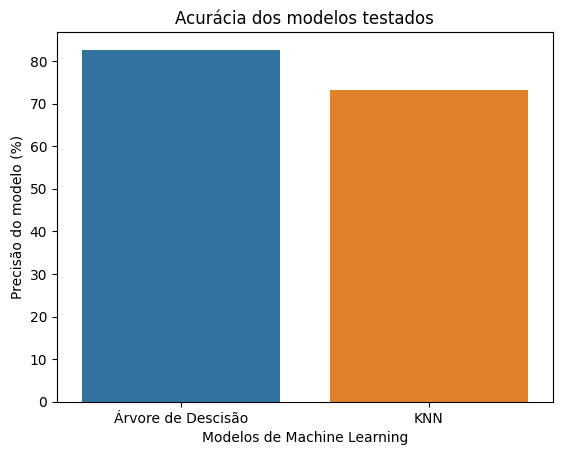

In [48]:
# Plotando estes dados de acurácia em forma de gráfico

modelos = ["Árvore de Descisão","KNN"]
acuracia = [acuracia_arvore, acuracia_knn]

sns.barplot(x=modelos, y=acuracia)
plt.title('Acurácia dos modelos testados')
plt.xlabel('Modelos de Machine Learning')
plt.ylabel('Precisão do modelo (%)');

Pelos resultados acima, percebe-se que o modelo que apresentou melhor acurácia foi o Árvore de Descisão, com 82.33% de acertos na base de teste. Logo, utilizou-se este modelo para aplicar na base de novos clientes.

## Fazendo novas predições

Para tal, primeiro é necessário importar a nova base.

In [49]:
novos_clientes = pd.read_csv("novos_clientes.csv")
display(novos_clientes)

,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,empresario,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,...,29.934186,218.0,44.50951,baixo_gasto_pagamento_baixo,312.487689,1,1,0,0,0
1,4,32.0,advogado,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,...,28.819407,12.0,0.00000,baixo_gasto_pagamento_medio,300.994163,0,0,0,0,1
2,2,48.0,empresario,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,...,34.235853,215.0,0.00000,baixo_gasto_pagamento_alto,345.081577,0,1,0,1,0


In [50]:
novos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes                       3 non-null      int64  
 1   idade                     3 non-null      float64
 2   profissao                 3 non-null      object 
 3   salario_anual             3 non-null      float64
 4   num_contas                3 non-null      float64
 5   num_cartoes               3 non-null      float64
 6   juros_emprestimo          3 non-null      float64
 7   num_emprestimos           3 non-null      float64
 8   dias_atraso               3 non-null      float64
 9   num_pagamentos_atrasados  3 non-null      float64
 10  num_verificacoes_credito  3 non-null      float64
 11  mix_credito               3 non-null      object 
 12  divida_total              3 non-null      float64
 13  taxa_uso_credito          3 non-null      float64
 14  idade_historic

In [51]:
novos_clientes.dtypes

mes                           int64
idade                       float64
profissao                    object
salario_anual               float64
num_contas                  float64
num_cartoes                 float64
juros_emprestimo            float64
num_emprestimos             float64
dias_atraso                 float64
num_pagamentos_atrasados    float64
num_verificacoes_credito    float64
mix_credito                  object
divida_total                float64
taxa_uso_credito            float64
idade_historico_credito     float64
investimento_mensal         float64
comportamento_pagamento      object
saldo_final_mes             float64
emprestimo_carro              int64
emprestimo_casa               int64
emprestimo_pessoal            int64
emprestimo_credito            int64
emprestimo_estudantil         int64
dtype: object

Da mesma forma que fizemos com a base antiga de clientes, é necessário converter os dados das colunas "object" para dados numéricos. Como a base não apresenta a coluna "score_credito", pois queremos calculá-la, todas as colunas com texto serão convertidas.

In [52]:
for coluna in novos_clientes.columns:
    if novos_clientes[coluna].dtype == "object":
        novos_clientes[coluna] = conversor.fit_transform(novos_clientes[coluna])

novos_clientes.dtypes

mes                           int64
idade                       float64
profissao                     int32
salario_anual               float64
num_contas                  float64
num_cartoes                 float64
juros_emprestimo            float64
num_emprestimos             float64
dias_atraso                 float64
num_pagamentos_atrasados    float64
num_verificacoes_credito    float64
mix_credito                   int32
divida_total                float64
taxa_uso_credito            float64
idade_historico_credito     float64
investimento_mensal         float64
comportamento_pagamento       int32
saldo_final_mes             float64
emprestimo_carro              int64
emprestimo_casa               int64
emprestimo_pessoal            int64
emprestimo_credito            int64
emprestimo_estudantil         int64
dtype: object

Agora, com os dados já convertidos, aplicou-se a esta nova base para o modelo definido acima (árvor de descisão), para que este possa prever o score_credito de cada um dos novos clientes.

In [53]:
#calculando o score_credito dos novos clientes
novos_scores = modelo_arvore_treinado.predict(novos_clientes)

#mostrando em tela os dados calculados
print(f"Scores previstos = {novos_scores}")

Scores previstos = ['Poor' 'Good' 'Standard']


Assim, tem-se que, para os 3 novos clientes, as análises de crédito são Ruim, Bom e Médio, respectivamente. 

Para finalizar, adicionou-se os novos resultados previstos a tabela de novos clientes.

In [54]:
novos_clientes['score_previsto'] = novos_scores

#exibindo algumas colunas do dataset
novos_clientes[['mes', 'idade', 'profissao', 'salario_anual', 'score_previsto']]

,mes,idade,profissao,salario_anual,score_previsto
0,1,31.0,1,19300.340,Poor
1,4,32.0,0,12600.445,Good
2,2,48.0,1,20787.690,Standard
